# Aula 1 - Introdução com pandas e numpy


In [1]:
import pandas as pd

data = {
    'Nome': ['Ana', 'Joao', 'Maria'],
    'Idade': [25, 30, 28],
    'Salário': [5000, 7000, 6000]
}

df = pd.DataFrame(data)

In [2]:
import numpy as np

arr = np.array([1, 2, 3, 4, 5])
print(arr+10)
print(arr-1)
print(arr*2)
print(arr**2)
print(arr//2) #divisão inteira (Arredonda para baixo)

[11 12 13 14 15]
[0 1 2 3 4]
[ 2  4  6  8 10]
[ 1  4  9 16 25]
[0 1 1 2 2]


In [3]:
import pandas as pd
import numpy as pd

np.random.seed()
meses = np.array(['Jan', 'Fev', 'Mar', 'Abr', 'Mai'])
vendas = np.random.randint (100, 500, size=5)
custos = vendas * np.random.uniform (0.3, 0.7, size=5)

print(meses)
print(vendas)
print(custos)

['Jan' 'Fev' 'Mar' 'Abr' 'Mai']
[496 251 146 183 257]
[163.00056193 161.16480993  64.24121707  57.66965268 141.0458778 ]


In [4]:
import pandas as pd
import numpy as np

dados = pd.DataFrame({
    'Mês': meses,
    'Vendas (R$)': vendas,
    'Custos (R$)': custos,
    'Clientes': np.random.poisson(lam=50, size=5)
})

display(dados)

,Mês,Vendas (R$),Custos (R$),Clientes
0,Jan,496,163.000562,52
1,Fev,251,161.164810,38
2,Mar,146,64.241217,44
3,Abr,183,57.669653,46
4,Mai,257,141.045878,62


In [5]:
dados['Lucro (R$)'] = dados['Vendas (R$)'] - dados['Custos (R$)']

display(dados)

,Mês,Vendas (R$),Custos (R$),Clientes,Lucro (R$)
0,Jan,496,163.000562,52,332.999438
1,Fev,251,161.164810,38,89.835190
2,Mar,146,64.241217,44,81.758783
3,Abr,183,57.669653,46,125.330347
4,Mai,257,141.045878,62,115.954122


In [ ]:
dados['Teste'] = (dados['Vendas (R$)'] * dados['Custos (R$)']).round(2)

display(dados)

In [8]:
dados = dados.drop(columns=['Teste'])

In [9]:
#Pandas
#dados['Margem (%)'] = ((dados['Lucro (R$)']/dados['Vendas (R$)'])*100).round(1)

#Numpy
dados['Margem (%)'] = np.round((dados['Lucro (R$)']/dados['Vendas (R$)'])*100, 1)



display(dados)

,Mês,Vendas (R$),Custos (R$),Clientes,Lucro (R$),Margem (%)
0,Jan,496,163.000562,52,332.999438,67.1
1,Fev,251,161.164810,38,89.835190,35.8
2,Mar,146,64.241217,44,81.758783,56.0
3,Abr,183,57.669653,46,125.330347,68.5
4,Mai,257,141.045878,62,115.954122,45.1


# Aula 2 - Operações matemáticas com Pandas e Numpy

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

# 1. Geração de dados fictícios
np.random.seed(42)
meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho']
categorias = ['Eletrônicos', 'Vestuário', 'Alimentos', 'Móveis', 'Livros']

dados = {
    'mês_aquisicao': np.random.choice(meses, size=100),
    'nome': [f'Produto {i+1:02d}' for i in range(100)],
    'tipo': np.random.choice(categorias, size=100),
    'preco_compra': np.round(np.random.uniform(10, 500, size=100), 2),
    'preco_venda': lambda x: np.round(x * np.random.uniform(1.2, 2.5, size=100), 2),
    'estoque': np.random.randint(0, 100, size=100)
}
dados['preco_venda'] = dados['preco_venda'](dados['preco_compra'])

# 2. Criação do DataFrame
df = pd.DataFrame(dados)

# 3. Cálculo de métricas
df['lucro_unitario'] = df['preco_venda'] - df['preco_compra']
df['valor_estoque'] = df['preco_compra'] * df['estoque']

# 4. Salvar para CSV
df.to_csv('produtos100.csv', index=False, encoding='utf-8-sig', sep=';', decimal=',')

# 5. Exemplo de análise
print(f"Total de produtos: {len(df)}")
print(f"Valor total em estoque: R$ {df['valor_estoque'].sum():,.2f}")
print("\n5 primeiros registros:")
display(df.head())

# Aula 3 - Variância e Desvio Padrão

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


#CARTEIRAS
carteiras = {
    'carteira_A': [0.01,0.02,-0.015,0.03,0.005],
    'carteira_B': [0.012,0.015,-0.01,0.025,0.008],
    'carteira_C': [0.1,0.025,0.02,0.025,0.027,0.03],
    'carteira_D': [0.1,0.027,0.03,0.0225,0.023,0.03],
    'carteira_E': [0.1,0.02,0.03,0.04,0.05,0.06],
    'carteira_F': [-0.1,-0.02,-0.03,-0.035,-0.04,-0.055]
}

#VARIÂNCIA E DESVIO PADRÃO
analises = {
    'carteira': list(carteiras.keys()),
    'variancia': [np.var(retornos) for retornos in carteiras.values()],
    'desviopadrao': [np.std(retornos) for retornos in carteiras.values()]
}

#DF - Var e DP
vardp= pd.DataFrame(analises)



#COVARIANCIAS
c, d = carteiras['carteira_C'], carteiras['carteira_D']
e, f = carteiras['carteira_E'], carteiras['carteira_F']

#CÁLCULO
cov_cd_pop = np.cov(c, d, bias=True)[0, 1]   # C e D (populacional)
cov_ef_amo = np.cov(e, f, bias=False)[0, 1]  # E e F (amostral)

#DF - Covar
covar = pd.DataFrame({
    'Par de Carteiras': ['C e D (Populacional)', 'E e F (Amostral)'],
    'Covariância': [cov_cd_pop, cov_ef_amo]
})



#CORRELAÇÃO
a, b = carteiras['carteira_A'], carteiras['carteira_B']

#CÁLCULO
cor_ab = np.corrcoef(a, b,)[0,1]

#DF - Correlação
correl = pd.DataFrame({
    'Par de Carteiras': ['A e B'],
    'Correlação': [cor_ab]
})


In [ ]:
display(vardp.head(10))
display(covar.head(10))
display(correl.head(10))

,carteira,variancia,desviopadrao
0,carteira_A,0.000230,0.015166
1,carteira_B,0.000132,0.011472
2,carteira_C,0.000782,0.027961
3,carteira_D,0.000759,0.027553
4,carteira_E,0.000667,0.025820
5,carteira_F,0.000681,0.026087


,Par de Carteiras,Covariância
0,C e D (Populacional),0.00076
1,E e F (Amostral),-0.00080


,Par de Carteiras,Correlação
0,A e B,0.988636


# Aula 4 - Outliers, boxplot, amplitude total e limites


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#CARTEIRAS
carteira_A = [0.01,0.02,-0.015,0.03,0.005]
carteira_B = [0.012,0.015,-0.01,0.025,0.008]
carteira_C = [0.1,0.025,0.02,0.025,0.027,0.03]
carteira_D = [0.1,0.027,0.03,0.0225,0.023,0.03]
carteira_E = [0.1,0.02,0.03,0.04,0.05,0.06]
carteira_F = [-0.1,-0.02,-0.03,-0.035,-0.04,-0.055]
carteira_G = [0.15, -0.05, 0.07, 0.03, -0.02, 0.04, -0.03, 0.08]
carteira_H = [0.02, 0.015, 0.017, 0.021, 0.019, 0.022, 0.025, 0.018]


#Função para análise descritiva completa
def analise_descritiva(dados, nome):
    print(f'\n=== Analise da Carteira {nome} ===')
    print(f'Média: {np.mean(dados):.4f}')
    print(f'Mediana: {np.median(dados):.4f}')
    print(f'Desvio Padrão: {np.std(dados):.4f}')
    print(f'Variância: {np.var(dados):.4f}')
    print(f'Valor Mínimo: {np.min(dados):.4f}')
    print(f'Valor Máximo: {np.max(dados):.4f}')

    q1, q2, q3 = np.percentile(dados, [25, 50, 75])
    iqr = q3 - q1
    limite_inf = q1 - 1.5 * iqr
    limite_sup = q3 + 1.5 * iqr

    print('\nMedidas de Posição:')
    print(f'Q1 (25%): {q1:.4f}')
    print(f'Q2/Mediana (50%): {q2:.4f}')
    print(f'Q3 (75%): {q3:.4f}')
    print(f'IQR: {iqr:.4f}')

    print('\nLimites para Outliers')
    print(f'Limite Inferior: {limite_inf:.4f}')
    print(f'Limite Superior: {limite_sup:.4f}')

    outliers = [x for x in dados if x < limite_inf or x > limite_sup]
    print(f'\nOutliers Detectados: {outliers}')

   

In [ ]:
# Boxplot individual detalhado
plt.figure(figsize=(8, 6))
plt.boxplot(carteira_E, vert=True, patch_artist=True,
           boxprops=dict(facecolor='lightblue'),
           whiskerprops=dict(color='blue'),
           capprops=dict(color='red'),
           medianprops=dict(color='black'))
plt.title("Boxplot Detalhado - Carteira E", pad=20)
plt.ylabel("Retorno (%)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
 
# Boxplot comparativo
plt.figure(figsize=(10, 6))
box = plt.boxplot([carteira_A, carteira_B, carteira_E, carteira_F, carteira_G, carteira_H],
                 labels=["A", "B", "E", "F", "G", "H"],
                 patch_artist=True,
                 medianprops=dict(color='black'))
 
# Customização de cores
colors = ['lightgreen', 'lightblue', 'lavender', 'peachpuff', 'lightyellow', 'honeydew']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
 
plt.title("Comparação de Retornos entre Carteiras", pad=20)
plt.ylabel("Retorno (%)")
plt.xlabel("Carteira")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Aplicação das medidas e gráficos à base dos Alunos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Geração de dados fictícios para alunos
np.random.seed(42)
alunos = [f'Aluno {i+1:02d}' for i in range(50)]
disciplinas = ['Front-end', 'Back-end', 'Cibersegurança', 'Big Data', 'Java', 'Python', '.NET', 'PHP', 'C#']

dados = {
    'nome_aluno': np.random.choice(alunos, size=200),  # Cada aluno terá múltiplas disciplinas
    'disciplina': np.random.choice(disciplinas, size=200),
    'nota_prova': np.round(np.random.uniform(0, 10, size=200), 2),
    'nota_trabalho': np.round(np.random.uniform(0, 10, size=200), 2),
    'média_final': np.round((dados['nota_prova'] * 0.5) + (dados['nota_trabalho'] * 0.5), 2),
    'frequencia': np.random.randint(50, 100, size=200)  # Percentual de frequência
}

# 2. Criação do DataFrame
df_alunos = pd.DataFrame(dados)

# Exibição dos primeiros registros
print(df_alunos.head())

  nome_aluno disciplina  nota_prova  nota_trabalho  média_final  frequencia
0   Aluno 39     Python        7.26           6.85         7.06          72
1   Aluno 29        PHP        9.76           1.63         5.70          59
2   Aluno 15         C#        5.16           9.11         7.14          93
3   Aluno 43   Big Data        3.23           8.23         5.73          51
4   Aluno 08  Front-end        7.95           9.50         8.72          62


In [ ]:
#Aplicação das medidas estatísticas

# Função para análise descritiva completa dos alunos
def analise_descritiva(dados, nome):
    print(f'\n=== Análise da Disciplina {nome} ===')
    print(f'Média das notas: {np.mean(dados):.4f}')
    print(f'Mediana das notas: {np.median(dados):.4f}')
    print(f'Desvio Padrão: {np.std(dados):.4f}')
    print(f'Variância: {np.var(dados):.4f}')
    print(f'Valor Mínimo: {np.min(dados):.4f}')
    print(f'Valor Máximo: {np.max(dados):.4f}')

    q1, q2, q3 = np.percentile(dados, [25, 50, 75])
    iqr = q3 - q1
    limite_inf = q1 - 1.5 * iqr
    limite_sup = q3 + 1.5 * iqr

    print('\nMedidas de Posição:')
    print(f'Q1 (25%): {q1:.4f}')
    print(f'Q2/Mediana (50%): {q2:.4f}')
    print(f'Q3 (75%): {q3:.4f}')
    print(f'IQR: {iqr:.4f}')

    print('\nLimites para Outliers')
    print(f'Limite Inferior: {limite_inf:.4f}')
    print(f'Limite Superior: {limite_sup:.4f}')

    outliers = [x for x in dados if x < limite_inf or x > limite_sup]
    print(f'\nOutliers Detectados: {outliers}')

# Aplicando a função aos dados dos alunos
for disciplina in df_alunos['disciplina'].unique():
    notas_disciplina = df_alunos[df_alunos['disciplina'] == disciplina]['média_final']
    analise_descritiva(notas_disciplina, disciplina)


=== Análise da Disciplina Python ===
Média das notas: 5.1228
Mediana das notas: 5.0600
Desvio Padrão: 1.7401
Variância: 3.0281
Valor Mínimo: 2.0100
Valor Máximo: 8.5200

Medidas de Posição:
Q1 (25%): 3.9000
Q2/Mediana (50%): 5.0600
Q3 (75%): 6.0300
IQR: 2.1300

Limites para Outliers
Limite Inferior: 0.7050
Limite Superior: 9.2250

Outliers Detectados: []

=== Análise da Disciplina PHP ===
Média das notas: 4.4800
Mediana das notas: 4.7500
Desvio Padrão: 2.1406
Variância: 4.5820
Valor Mínimo: 0.5200
Valor Máximo: 9.3400

Medidas de Posição:
Q1 (25%): 2.9375
Q2/Mediana (50%): 4.7500
Q3 (75%): 5.5725
IQR: 2.6350

Limites para Outliers
Limite Inferior: -1.0150
Limite Superior: 9.5250

Outliers Detectados: []

=== Análise da Disciplina C# ===
Média das notas: 4.9406
Mediana das notas: 5.0800
Desvio Padrão: 1.6920
Variância: 2.8630
Valor Mínimo: 0.9200
Valor Máximo: 7.2900

Medidas de Posição:
Q1 (25%): 4.5800
Q2/Mediana (50%): 5.0800
Q3 (75%): 5.5000
IQR: 0.9200

Limites para Outliers
Limit

C:\Users\Caio\AppData\Local\Temp\ipykernel_10244\1840291063.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(dados_boxplot, labels=labels_disciplinas, patch_artist=True, medianprops=dict(color='black'))


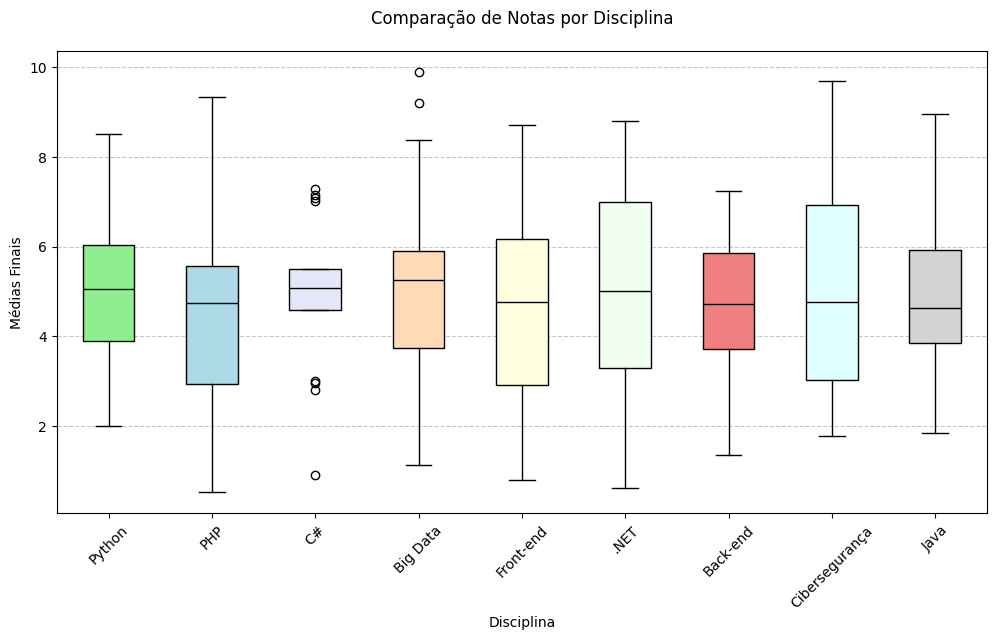

In [ ]:
#Gráficos de Boxplot

# Preparação dos dados para o boxplot
dados_boxplot = [df_alunos[df_alunos['disciplina'] == disciplina]['média_final'] for disciplina in df_alunos['disciplina'].unique()]
labels_disciplinas = df_alunos['disciplina'].unique()

# Criando o gráfico boxplot
plt.figure(figsize=(12, 6))
box = plt.boxplot(dados_boxplot, labels=labels_disciplinas, patch_artist=True, medianprops=dict(color='black'))

# Customização de cores para diferenciar disciplinas
colors = ['lightgreen', 'lightblue', 'lavender', 'peachpuff', 'lightyellow', 'honeydew', 'lightcoral', 'lightcyan', 'lightgrey']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Ajustes estéticos
plt.title("Comparação de Notas por Disciplina", pad=20)
plt.ylabel("Médias Finais")
plt.xlabel("Disciplina")
plt.xticks(rotation=45)  # Inclinar os rótulos para melhor visualização
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Aula 5 - Assimetria e Curtose

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

salarios={'Salários':[10,20,30,40,50,60,70,80,90,100,5]}
df=pd.DataFrame(salarios)

display(df)

In [ ]:
# Função para análise descritiva completa
def analise_descritiva(df):
    print(f"\n=== Análise dos Salários ===")
    print(f"Média: {df['Salários'].mean():.4f}")
    print(f"Mediana: {df['Salários'].median():.4f}")
    print(f"Desvio Padrão: {df['Salários'].std():.4f}")
    print(f"Variância: {df['Salários'].var():.4f}")
    print(f"Valor Mínimo: {df['Salários'].min():.4f}")
    print(f"Valor Máximo: {df['Salários'].max():.4f}")

    q1, q2, q3 = np.percentile(df['Salários'], [25, 50, 75])
    iqr = q3 - q1
    limite_inf = q1 - 1.5 * iqr
    limite_sup = q3 + 1.5 * iqr

    print("\nMedidas de Posição:")
    print(f"Q1 (25%): {q1:.4f}")
    print(f"Q2/Mediana (50%): {q2:.4f}")
    print(f"Q3 (75%): {q3:.4f}")
    print(f"IQR: {iqr:.4f}")

    print("\nLimites para Outliers:")
    print(f"Limite Inferior: {limite_inf:.4f}")
    print(f"Limite Superior: {limite_sup:.4f}")

    outliers = [x for x in df['Salários'] if x < limite_inf or x > limite_sup]
    print(f"\nOutliers Detectados: {outliers}")

    assimetria = df['Salários'].skew()
    if -0.5 <= assimetria <= 0.5:
      print (f'\nA distribuição {assimetria:.4f} é simétrica')
    elif assimetria > 0.5:
      print (f'\nA distribuição assimétrica {assimetria:.4f} é positiva.')
    else:
      print (f'\nA distribuição assimétrica {assimetria:.4f} é negativa.')

    curtose = df['Salários'].kurtosis()
    if 2.5 <= curtose <= 3.5:
      print (f'\nA curtose {curtose:.4f} é mesocúrtica.')
    elif curtose > 3.5:
      print (f'\nA curtose {curtose:.4f} é leptocúrtica.')
    else:
      print (f'\nA curtose {curtose:.4f} é platicúrtica.')

analise_descritiva(df)

In [ ]:
# Boxplot individual detalhado
plt.figure(figsize=(8, 6))
plt.boxplot(df['Salários'], vert=True, patch_artist=True,
           boxprops=dict(facecolor='lightblue'),
           whiskerprops=dict(color='blue'),
           capprops=dict(color='red'),
           medianprops=dict(color='black'))
plt.title("Boxplot Salários", pad=20)
plt.ylabel("Salários")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()